# Lab session of Image Analysis
## BE 2. Image filtering, edge detection, object detection
### Duration: 2h


**Instructions** Take and edit this **notebook** and submit it for each group (binome) of the session, name it **LabX_Name1_Name2**, with X the number of the lab session and **Name1,2** your surnames. Upload it in the folder corresponding to your group and lab in **Chamilo**.

**Deadline submission** The material report should be submitted within a week from the lab work. The preparation has to be done individually and will be collected at the **beginning** of the lab.

**Objectives** The objectives of this lab work are:
- Evaluate the performances of image denoising
- Object detection by phase correlation


**Pay attention** to the following:
- always check the image types and ranges (e.g., (-1,1) or (0,255), ...)
- always check the packages documentation in order to be sure of the function signature
- always prefer working with float images when manipulating over them. You can use the function `skimage.util.img_as_float` and `skimage.util.img_as_ubyte` for representing the image as float in the range (-1,1) and as uint8 in the range (0,255), respectively. NOTE: these function will not work when the ranges of variability of the pixels are different from the ones above (i.e., if you adjust the saturation, etc...). When this arises, use the function `cv2.normalize(...)` jointly with numpy's `astype(...)` as shown in section 1.1.

In [3]:
# import of needed packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy.ndimage import convolve, median_filter, sobel
%matplotlib inline


# 1. Noise filtering

To evaluate the performances of image denoising, we artificially add noise to images and try to remove it. This way, we can compare the denoised image to the reference one.

## 1.1 Noise simulation

- Add Gaussian noise to the images **cameraman**, **baboon** and **cafe**.

  Note: use `Inoisy = Iin + sigma * numpy.random.normal(size=img1.shape)`, where `Iin` is the input image and `sigma` the standard deviation of the noise.

- Comment on the image histogram before and after adding noise, with different values of the noise level `sigma`.

- Add *salt & pepper* noise to the image with the function `Inoisy2=skimage.util.random_noise(Iin, mode='s&p', amount=dens)`, where `dens` represents the noise density.



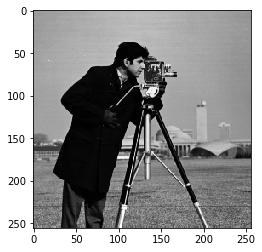

In [9]:
# example: open and show images
img1=cv2.imread('./images/cameraman.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray')
plt.show()

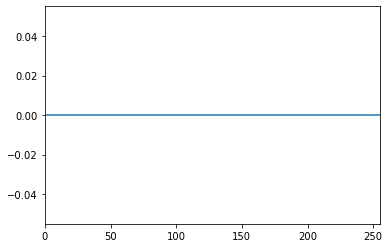

In [7]:
# image histogram computation
# Many libraries can be used. Here we will use OpenCV

hist_img1 = cv2.calcHist([img1],[0],None,[256],[0,255])  # check out the documentation for explanation

# plot the histogram
plt.plot(hist_img1)
plt.xlim([0,255])
plt.show()


In [8]:
sigma = 20
noise = np.random.normal(size=img1.shape)
img1_noisy = img1 + sigma * noise

# we normalize the image in the original range [0,255] and we convert back to uint8
cv2.normalize(img1_noisy, img1_noisy, 0, 255, cv2.NORM_MINMAX, dtype=-1)
img1_noisy = img1_noisy.astype(np.uint8)

plt.imshow(img1_noisy, cmap='gray')
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

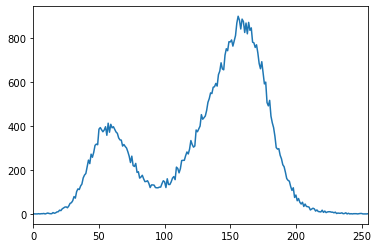

In [8]:
# image histogram computation
# both numpy and OpenCV (cv2) can be used. Here we will use OpenCV

hist_img1_noisy = cv2.calcHist([img1_noisy],[0],None,[256],[0,256])  # check out the documentation for explanation

# plot the histogram
plt.plot(hist_img1_noisy)
plt.xlim([0,255])
plt.show()

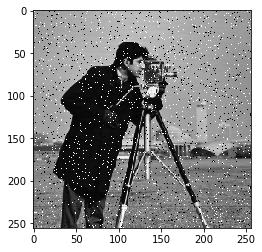

In [9]:
density = 0.05
sp_img1 = random_noise(img1, mode='s&p', seed=None,amount=density)

plt.imshow(sp_img1, cmap='gray')
plt.show()


## 1.2 Denoising
For each of the two noisy images of the prevous section perform the following operations:

**Mean filtering**

The simplest way to denoise an image is by linear filtering, and the simplest linear filter is the mean filter,
with all its coefficients equal (use `cv2.filter2D(...)` or `scipy.ndimage.convolve(...)`), and `np.ones` to create the filter).
- Recall the principle of mean filtering.
- For each of the three noisy images (with `sigma=20` and `dens=0.2`), find the size of the mean filter which provides the best image after filtering.

**Median filtering**
- Recall the principle of median filtering.
- For each of the three noisy images (with `sigma=20` and `dens=0.2`), find the size of the median filter which
provides the best image after filtering. (use `cv2.medianBlur(...)` or `scipy.ndimage.median_filter(...)`).

In [53]:
# img1_denoisCV = cv2.filter2D(img1_noisy, cv2.CV_8U, FILL_HERE_WITH_MEAN_FILTER)  # possible strategy
# img1_denois = convolve(img1_noisy, FILL_HERE_WITH_MEAN_FILTER)  # recommended

# To-Do

In [55]:
# img1_sp_denois = cv2.medianBlur(sp_img1, FILL_HERE_WITH_SIZE)  # possible strategy
# img1_sp_denois = median_filter(sp_img1, FILL_HERE_WITH_SIZE)  # recommended

# To-Do

## 1.3 Quality assessment

For the above denoising procedures, assess the "objective" quality of the image by comparing the original $I_{in}$ and the denoised image $I_{den}$ through PSNR; we remind here its definition:

$PSNR = 10 \log_{10} (\frac{d^2}{\text{MSE}(I_{in}, I_{den})})$

where $d$ is the maximum possible value of the image ($d = 255$ for 8-bit images) and MSE represents the mean square error among the two images. What are the possible disadvantages of using this quality index?





In [ ]:
# To-Do

# 2. Edge detection

- How would you find the edge of an image?
- Get the magnitude of the gradient of the images cameraman, baboon and cafe, using the Sobel filters (in the horizontal and vertical direction; then take the mean square of the two results to summarize the results in both directions). You can use the function `cv2.Sobel(...)` (doc: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) or `scipy.ndimage.sobel(...)` (recommended).









In [57]:
# dx_im = cv2.Sobel(img1,cv2.CV_8U,1,0)
# dx_img = sobel(img1, axis=0) # horizontal derivative

# To-Do


# 3. Object detection and phase correlation

Open the image `tokens.tif` as `Iin`. The goal is to detect the position of tokens, specifically a black image with a white dot at the center of each token. For this, implement the phase correlation method using a simulated disk $I_d$ as the element to detect. We briefly recall here that the requested map $R$ may be obtained as:

$R = F^{-1}(\frac{F(I_{in}) F(I_{d})^*}{|F(I_{in}) F(I_{d})^*|})$

where $F(\cdot)$ is a Fourier transform, $F^{-1}(\cdot)$ its inverse, $*$ is the complex conjugate and $|\cdot|$ a module oparation.

Mathematically, why does this operation perform a phase correlation?

(Hint: use `np.fft.fft2(...)` for the Fourier transform of the image)

In [ ]:
# To-Do